# Day 1


## part 1


In [126]:
import re


pattern = re.compile(r"\d")
calibration_sum = 0

with open("inputs/01.txt") as f:
    for line in f:
        nums = pattern.findall(line)
        calibration_sum += int(f"{nums[0]}{nums[-1]}")

calibration_sum

54927

## part 2


In [127]:
spelled_numbers = {
    "one": "1",
    "two": "2",
    "three": "3",
    "four": "4",
    "five": "5",
    "six": "6",
    "seven": "7",
    "eight": "8",
    "nine": "9",
}

# handle overlapping matches like "eighthree"
pattern = re.compile(f"(?=(\d|{'|'.join(spelled_numbers.keys())}))")
calibration_sum = 0

with open("inputs/01.txt") as f:
    for line in f:
        nums = [spelled_numbers.get(x, x) for x in pattern.findall(line)]
        calibration_sum += int(f"{nums[0]}{nums[-1]}")

calibration_sum

54581

# Day 2


## part 1


In [129]:
import re
import math


max_cubes = {"red": 12, "green": 13, "blue": 14}

pattern = re.compile(r"(\d+) (red|green|blue)")
valid_ids_sum = 0

with open("inputs/02.txt") as f:
    for line in f:
        id, trials = line.split(":")
        id = int(id.split()[-1])

        trials = pattern.findall(trials)
        trials = [(color, int(num)) for num, color in trials]
        valid = [max_cubes[color] >= num for (color, num) in trials]

        if all(valid):
            valid_ids_sum += id

valid_ids_sum

2512

## part 2


In [130]:
power_set_sum = 0

with open("inputs/02.txt") as f:
    for line in f:
        trials = line.split(":")[-1]
        trials = pattern.findall(trials)
        trials = [(color, int(num)) for num, color in trials]

        max_color = {"red": 0, "green": 0, "blue": 0}

        for color, num in trials:
            max_color[color] = max(max_color[color], num)

        power_set_sum += math.prod(max_color.values())

power_set_sum

67335

# Day 3


## part 1


In [131]:
import string
import itertools
import math


def padding_row(line_len):
    return "".join(["."] * line_len + ["\n"])


def pad_row(row):
    return [".", *row.strip(), "."]


def pad_iterator(iterator):
    line_len = len(iterator.readline().strip())
    iterator.seek(0)

    return itertools.chain([padding_row(line_len)], iterator)


def part_number(top, middle, bottom, window_start, window_end, symbols):
    num = int("".join(middle[window_start:window_end]))

    top = set(top[window_start - 1 : window_end + 1])
    middle = set(middle[window_start - 1 : window_end + 1])
    bottom = set(bottom[window_start - 1 : window_end + 1])

    if len((top | middle | bottom) & symbols) > 0:
        return num
    else:
        return 0


symbols = set(string.punctuation) - {"."}
is_last_row = False
parts_sum = 0

with open("inputs/03.txt") as f:
    f = pad_iterator(f)

    top = next(f)
    middle = next(f)
    bottom = next(f)

    top, middle = pad_row(top), pad_row(middle)

    while bottom is not None:
        bottom = pad_row(bottom)
        window_start = window_end = 1
        found_number = False

        while window_end < len(middle):
            match found_number, middle[window_end].isnumeric():
                case True, False:
                    parts_sum += part_number(top, middle, bottom, window_start, window_end, symbols)
                    found_number = False
                case False, True:
                    found_number = True
                    window_start = window_end

            window_end += 1

        top = middle
        middle = bottom
        bottom = next(f, None)

        if bottom is None and not is_last_row:
            is_last_row = True
            bottom = padding_row(len(middle))

parts_sum

525911

## part 2


In [132]:
def get_number(row, position):
    left = right = position
    while row[left - 1].isnumeric():
        left -= 1
    while row[right + 1].isnumeric():
        right += 1
    return int("".join(row[left : right + 1]))


def check_top_or_bottom(row, position):
    nums = []
    if row[position].isnumeric():
        nums.append(get_number(row, position))
    else:
        if row[position - 1].isnumeric():
            nums.append(get_number(row, position - 1))
        if row[position + 1].isnumeric():
            nums.append(get_number(row, position + 1))

    return nums


def check_left_or_right(row, position):
    nums = []
    if row[position].isnumeric():
        nums.append(get_number(row, position))

    return nums


is_last_row = False
gear_product = 0

with open("inputs/03.txt") as f:
    f = pad_iterator(f)

    top = next(f)
    middle = next(f)
    bottom = next(f)

    top, middle = pad_row(top), pad_row(middle)

    while bottom is not None:
        bottom = pad_row(bottom)

        for coords, char in enumerate(middle):
            if char == "*":
                nums = [
                    *check_top_or_bottom(top, coords),
                    *check_top_or_bottom(bottom, coords),
                    *check_left_or_right(middle, coords - 1),
                    *check_left_or_right(middle, coords + 1),
                ]

                if len(nums) == 2:
                    gear_product += math.prod(nums)

        top = middle
        middle = bottom
        bottom = next(f, None)

        if bottom is None and not is_last_row:
            is_last_row = True
            bottom = padding_row(len(middle))

gear_product

75805607

# Day 4


## part 1


In [138]:
def get_plays(line):
    nums = line.split(":")[-1]
    winning, played = nums.split("|")
    winning, played = set(map(int, winning.split())), set(map(int, played.split()))

    return winning, played


def get_deck(filepath):
    deck = []
    with open(filepath) as f:
        for line in f:
            winning, played = get_plays(line)
            deck.append((winning, played))

    return deck


deck = get_deck("inputs/04.txt")
points = 0
for winning, played in deck:
    num_matches = len(winning & played)
    if num_matches > 0:
        points += 2 ** (num_matches - 1)

points

23847

## part 2


In [137]:
weights = [1] * len(deck)
for i, (winning, played) in enumerate(deck):
    num_matches = len(winning & played)

    if num_matches > 0:
        for j in range(1, num_matches + 1):
            weights[i + j] += weights[i]

sum(weights)

8570000

# Day 5


## part 1


In [121]:
import re


def parse_input(filepath):
    PARSING_INDICES = {
        "seed-to-soil map:": 0,
        "soil-to-fertilizer map:": 1,
        "fertilizer-to-water map:": 2,
        "water-to-light map:": 3,
        "light-to-temperature map:": 4,
        "temperature-to-humidity map:": 5,
        "humidity-to-location map:": 6,
    }

    pattern = re.compile(r"\d+")
    mappings = [list() for _ in range(7)]
    current_parse_index = None

    with open(filepath) as f:
        for line in f:
            if len(line.strip()) == 0:
                continue

            if line.strip() in PARSING_INDICES:
                current_parse_index = PARSING_INDICES[line.strip()]
                continue

            if current_parse_index is not None:
                destination, source, size = list(map(int, pattern.findall(line)))
                mappings[current_parse_index].append((source, source + size, destination))
            else:
                seeds = list(map(int, pattern.findall(line)))

    for m in mappings:
        m.sort(key=lambda x: x[0])

    return seeds, mappings


# assumes arr is sorted (ascending)
def search(arr, val):
    left, right = 0, len(arr) - 1
    result = None

    while left <= right:
        mid = (left + right) // 2
        if arr[mid][0] <= val:
            result = arr[mid]
            left = mid + 1
        else:
            right = mid - 1

    return result


def get_location(seed, mappings):
    loc = seed
    for m in mappings:
        range_map = search(m, loc)
        if range_map is not None and loc <= range_map[1]:
            loc += range_map[2] - range_map[0]

    return loc


def get_locations(seeds, mappings):
    locations = [*seeds]
    for i, seed in enumerate(locations):
        locations[i] = get_location(seed, mappings)

    return locations


# map is encoded as (source start, source end, destination start)
seeds, mappings = parse_input("inputs/05.txt")
counts = min(get_location(s, mappings) for s in seeds)

print(counts)

424490994


## part 2


In [122]:
# seed intervals are encoded as (start, end)
# for each seed interval, we need to propagate its through the maps

# for each I_source, offset in maps:
#    for each seed interval I_seed:
#       if I_seed is outside I_source: I_seed is propagated as is
#       if I_seed is inside I_source: I_seed is shifted by offset
#       if it overlaps we need to split the interval in 2
#           part of I_seed within I_source will be shifted by offset
#           part of I_seed outside I_source is propagated as is

# we end up with a bunch of intervals

# map : (source start, source end, destination start)
# seed: (seed start, seed end)

seed_intervals = [(start, start + size - 1) for start, size in zip(seeds[::2], seeds[1::2])]
current_intervals = [*seed_intervals]

for m in mappings:
    split_intervals = []

    for source_start, source_end, dest_start in m:
        offset = dest_start - source_start
        tmp_intervals = []

        while current_intervals:
            (seed_start, seed_end) = current_intervals.pop()

            left = (seed_start, min(seed_end, source_start))
            mid = (max(seed_start, source_start), min(source_end, seed_end))
            right = (max(source_end, seed_start), seed_end)

            if left[1] > left[0]:
                # identity
                tmp_intervals.append(left)
            if mid[1] > mid[0]:
                # split interval
                split_intervals.append((mid[0] + offset, mid[1] + offset))
            if right[1] > right[0]:
                # identity
                tmp_intervals.append(right)

        current_intervals = tmp_intervals

    current_intervals = [*current_intervals, *split_intervals]


min(start for start, _ in current_intervals)

15290096

# Day 6


## part 1


In [139]:
import math
import re


def parse_input(filepath):
    pattern = re.compile(r"\d+")
    with open(filepath) as f:
        lines = f.readlines()

    times = list(map(int, pattern.findall(lines[0])))
    distances = list(map(int, pattern.findall(lines[1])))

    return times, distances


def solve_real_roots(a, b, c):
    # assumes discriminant > 0
    discriminant = b**2 - 4 * a * c
    return (-b + math.sqrt(discriminant)) / (2 * a), (-b - math.sqrt(discriminant)) / (2 * a)


def get_combinations(times, distances):
    result = []
    for t_max, d_record in zip(times, distances):
        solutions = solve_real_roots(-1, t_max, -d_record)
        solutions = (math.floor(solutions[0]) + 1, math.ceil(solutions[1]) - 1)
        result.append(solutions[1] - solutions[0] + 1)

    return result


times, distances = parse_input("inputs/06.txt")
result = get_combinations(times, distances)

math.prod(result)

1108800

## part 2


In [140]:
times, distances = parse_input("inputs/06.txt")
times = [int("".join(list(map(str, times))))]
distances = [int("".join(list(map(str, distances))))]

result = get_combinations(times, distances)

result[0]

36919753

# Day 7


## part 1


In [53]:
from collections import Counter


def get_hands(filename):
    hands = []
    with open(filename) as f:
        for line in f:
            hand, bid = line.strip().split()
            hands.append((list(hand), int(bid)))

    return hands


def score_hand_type(hand):
    freqs = list(Counter(hand).values())
    match (len(freqs), max(freqs)):
        case (5, _):
            return 0
        case (4, _):
            return 1
        case (3, 2):
            return 2
        case (3, _):
            return 3
        case (2, 3):
            return 4
        case (2, _):
            return 5
        case (1, _):
            return 6


def score_cards(hand, cards_strength):
    # hand is encoded in base 13, convert it to base 10
    result = 0
    base = 13
    for i, card in enumerate(reversed(hand)):
        result += cards_strength[card] * (base**i)

    return result


def utility(hand, cards_strength):
    return score_hand_type(hand) * 1_000_000 + score_cards(hand, cards_strength)


hands = get_hands("inputs/07.txt")
cards_strength = {c: i for i, c in enumerate("23456789TJQKA")}
utilities = [utility(hand, cards_strength) for hand, _ in hands]
ranks = [sorted(utilities).index(x) + 1 for x in utilities]
winnings = sum(rank * bid for rank, (_, bid) in zip(ranks, hands))

winnings

246409899

## part 2


In [55]:
def score_hand_type_with_jokers(hand):
    replaced_hand = [*hand]
    joker_indices = [i for i, c in enumerate(hand) if c == "J"]

    if len(joker_indices) > 0:
        hand_wo_jokers = [c for c in hand if c != "J"]

        if len(hand_wo_jokers) > 0:
            most_common = Counter(hand_wo_jokers).most_common(1)[0][0]
            for idx in joker_indices:
                replaced_hand[idx] = most_common
        else:
            replaced_hand = ["A"] * len(hand)

    return score_hand_type(replaced_hand)


def utility_part2(hand, cards_strength):
    return score_hand_type_with_jokers(hand) * 1_000_000 + score_cards(hand, cards_strength)


cards_strength = {c: i for i, c in enumerate("J23456789TQKA")}

utilities = [utility_part2(hand, cards_strength) for hand, _ in hands]
ranks = [sorted(utilities).index(x) + 1 for x in utilities]
winnings = sum(rank * bid for rank, (_, bid) in zip(ranks, hands))

winnings

244848487

# Day 8


## part 1


In [2]:
import re
import math

In [5]:
def get_input(filename):
    match_node = re.compile(r"([A-Z]{3})")
    is_first_line = True
    instructions = None
    edge_list = dict()
    starting_nodes = []

    with open(filename) as f:
        for line in f:
            line = line.strip()

            if is_first_line:
                instructions = list(line)
                is_first_line = False
                continue

            if len(line) > 0:
                node = match_node.findall(line)
                position, left, right = node
                edge_list[position] = (left, right)

                if position[-1] == "A":
                    starting_nodes.append(position)

    return instructions, edge_list, starting_nodes


def get_steps(instructions, edge_list, start_node="AAA", end_node="ZZZ"):
    steps = 0
    is_arrived = False
    remaining_instructions = instructions[::-1]
    current_position = start_node

    while not is_arrived:
        if len(remaining_instructions) == 0:
            remaining_instructions = instructions[::-1]

        if remaining_instructions.pop() == "L":
            instruction = 0
        else:
            instruction = 1

        current_position = edge_list[current_position][instruction]

        # for part 1 and 2 respectively
        if (end_node and current_position == end_node) or (end_node is None and current_position[-1] == "Z"):
            is_arrived = True

        steps += 1

    return steps


instructions, edge_list, starting_nodes = get_input("inputs/08.txt")
steps = get_steps(instructions, edge_list)

steps

12361

## part 2

So the problem has a very specific structure where each starting node is in its own subgraph and each subgraphs are not connected. They have an additionnal structure such that given the instructions and a starting point, the path is cyclical to reach the first node ending with a "Z" (so if you continue, you'll reach the same node again in the same amount of steps) with the same period, as it takes the same number of steps to go from start to end, and from end to end.

With those special properties, we can simply find the number of steps to reach the first node ending with a "Z" for each starting point independently and find the smallest common multiple (LMC) of all the number of steps.


In [7]:
steps = [get_steps(instructions, edge_list, s, None) for s in starting_nodes]

math.lcm(*steps)

18215611419223

# Day 9


## part 1


In [72]:
import utils

sequences = []
with open("inputs/09.txt") as f:
    for line in f:
        sequences.append(utils.get_ints(line))


def diff(seq):
    result = [None] * (len(seq) - 1)
    for i in range(1, len(seq)):
        result[i - 1] = seq[i] - seq[i - 1]

    return result


def dfs(seq, values, idx):
    values.append(seq[idx])

    if all(s == 0 for s in seq):
        return

    dfs(diff(seq), values, idx)

    return values


# A = l[i] + l[i+1]
# B = A + l[i+2] = l[i] + l[i+1] + l[i+2] so it's just the sum of the last values
result = sum(sum(dfs(s, [], -1)) for s in sequences)
result

1995001648

## part 2


In [73]:
def dot(x, y):
    assert len(x) == len(y)
    res = 0
    for i in range(len(x)):
        res += x[i] * y[i]

    return res


extrapolations = 0
for distance in sequences:
    first_values = dfs(distance, [], 0)
    metric = [(-1) ** i for i in range(len(first_values))]
    extrapolations += dot(first_values, metric)

extrapolations

988

# Day 10


## part 1


In [402]:
from collections import deque


def plot(grid, points, symbol=None):
    new_grid = [["."] * len(grid[0]) for _ in range(len(grid))]
    for r, c in points:
        new_grid[r][c] = symbol if symbol else grid[r][c]

    for r in new_grid:
        print(" ".join(r))


def get_grid(filepath):
    grid = []
    with open(filepath) as f:
        for r, line in enumerate(f):
            line = list(line.strip())
            grid.append(line)

            for c, e in enumerate(line):
                if e == "S":
                    start = (r, c)
                    break

    return grid, start


def find_loop(grid, start):
    n_r, n_c = len(grid), len(grid[0])
    loop = set([start])
    to_visit = deque([start])

    while to_visit:
        r, c = to_visit.popleft()
        position = grid[r][c]
        next = None

        if r > 0 and position in ("S", "|", "J", "L") and grid[r - 1][c] in ("|", "7", "F") and (r - 1, c) not in loop:
            next = (r - 1, c)

        if (
            r < n_r - 1
            and position in ("S", "|", "7", "F")
            and grid[r + 1][c] in ("|", "L", "J")
            and (r + 1, c) not in loop
        ):
            next = (r + 1, c)

        if c > 0 and position in ("S", "-", "J", "7") and grid[r][c - 1] in ("-", "F", "L") and (r, c - 1) not in loop:
            next = (r, c - 1)

        if (
            c < n_c - 1
            and position in ("S", "-", "F", "L")
            and grid[r][c + 1] in ("-", "J", "7")
            and (r, c + 1) not in loop
        ):
            next = (r, c + 1)

        if next:
            loop.add(next)
            to_visit.append(next)

    return loop


grid, start = get_grid("inputs/10.txt")
loop = find_loop(grid, start)

len(loop) // 2

6886

## part 2


In [403]:
def count_interior_points(grid, loop):
    num_points = 0
    interior_points = []

    for r in range(1, len(grid) - 1):
        for c in range(1, len(grid[0]) - 1):
            if grid[r][c] == "S":
                grid[r][c] = "L"

            if (r, c) in loop:
                continue

            num_crossings = 0
            cc = c - 1
            while cc >= 0:
                if (r, cc) in loop:
                    if grid[r][cc] == "|":
                        num_crossings += 1
                    elif grid[r][cc] == "J":
                        cc -= 1
                        while cc >= 0 and grid[r][cc] == "-":
                            cc -= 1
                        if grid[r][cc] == "F":
                            num_crossings += 1
                    elif grid[r][cc] == "7":
                        cc -= 1
                        while cc >= 0 and grid[r][cc] == "-":
                            cc -= 1
                        if grid[r][cc] == "L":
                            num_crossings += 1

                cc -= 1

            if num_crossings % 2 == 1:
                num_points += 1
                interior_points.append((r, c))

    return interior_points


len(count_interior_points(grid, loop))

371

# Day 11


## part 1


In [228]:
def rotate(arr):
    return [list(i) for i in zip(*arr)]


def dist(a, b):
    y_a, x_a = a
    y_b, x_b = b
    return abs(x_b - x_a) + abs(y_b - y_a)


def get_galaxies(space):
    coords = []
    for r in range(len(space)):
        for c in range(len(space[0])):
            if space[r][c] == "#":
                coords.append((r, c))

    return coords


def expansion_inds(space):
    inds = []
    for r in range(len(space)):
        if "#" not in space[r]:
            inds.append(r)

    return inds


def get_distances(space, exp_f=1):
    r_expand = expansion_inds(space)
    c_expand = expansion_inds(rotate(space))
    galaxies = get_galaxies(space)

    distances = 0
    for i in range(len(galaxies)):
        for j in range(i + 1, len(galaxies)):
            ga, gb = galaxies[i], galaxies[j]

            r_sign = c_sign = 1
            if ga[0] > gb[0]:
                r_sign = -1
            if ga[1] > gb[1]:
                c_sign = -1

            min_r, min_c = min(ga[0], gb[0]), min(ga[1], gb[1])
            max_r, max_c = max(ga[0], gb[0]), max(ga[1], gb[1])
            nr_expand = len(list(filter(lambda x: min_r < x < max_r, r_expand)))
            nc_expand = len(list(filter(lambda x: min_c < x < max_c, c_expand)))

            nr_expand *= r_sign * exp_f
            nc_expand *= c_sign * exp_f

            distances += dist(ga, (gb[0] + nr_expand, gb[1] + nc_expand))

    return distances


space = []
with open("inputs/11.txt") as f:
    for line in f:
        space.append(list(line.strip()))

distances = get_distances(space)
distances

9403026

## part 2


In [229]:
distances = get_distances(space, exp_f=1_000_000 - 1)
distances

543018317006

# Day 12


## part 1


In [762]:
lines = []
with open("inputs/12.txt") as f:
    for line in f:
        conds, groups = line.split(" ")
        groups = tuple(utils.get_ints(line))
        lines.append((conds, groups))

In [763]:
def arrangements(conds, groups, memo={}):
    # base cases for tree parsing:
    # no more spot to check
    if len(conds) == 0:
        # and exhausted the groups then arrangement is valid
        if len(groups) == 0:
            return 1
        else:
            return 0
    # exhausted the groups but potentially still have spots
    if len(groups) == 0:
        # if some spring remains then the arrangement is not valid
        if "#" in conds:
            return 0
        else:
            return 1

    # check if we already checked this arrangement
    if (conds, groups) in memo:
        return memo[(conds, groups)]

    curr, size = conds[0], groups[0]
    counts = 0

    # if "." or "?" we advance without using a group (if it's a ? we remplace it by a .)
    if curr == "." or curr == "?":
        counts += arrangements(conds[1:], groups, memo)

    # for the second case with "?" we replace it by a # and do the same if it's a #.
    # we reduce groups and advance by size
    # For both it's only valid if:
    # - we can fit the current group in the remaining spots
    # - there is no . within the range defined by the current group size (otherwise it won't be contiguous and thus not valid)
    # - and if we have exactly size spots left or the last element at size index is not a # (otherwise we would have a +1 and thus not valid)
    if (
        (curr == "#" or curr == "?")
        and len(conds) >= size
        and "." not in conds[:size]
        and (size == len(conds) or conds[size] != "#")
    ):
        counts += arrangements(conds[size + 1 :], groups[1:])

    memo[(conds, groups)] = counts
    return counts


answer = 0
for line in lines:
    answer += arrangements(*line)

answer

7916

7916


## part 2


In [764]:
answer = 0
for line in lines:
    answer += arrangements("?".join([line[0]] * 5), line[1] * 5)

answer

37366887898686

# Day 13


## part 1


In [265]:
patterns = []
curr_pattern = []
with open("inputs/13.txt") as f:
    for line in f:
        line = line.strip()
        if len(line) > 0:
            curr_pattern.append(list(line))
        else:
            patterns.append(curr_pattern)
            curr_pattern = []

len(patterns)

100

In [268]:
def plot(pattern, t=False):
    if t:
        pattern = rotate(pattern)
    for l in pattern:
        print(" ".join(l))


def rotate(arr):
    return [list(i) for i in zip(*arr)]


def num_diffs(a, b):
    num_diff = 0
    for x, y in zip(a, b):
        if x != y:
            num_diff += 1

    return num_diff


def find_reflection_(pattern, max_diff=0):
    nr = len(pattern)
    for r in range(nr - 1):
        num_diff = 0
        for r_w in range(min(nr - (r + 1), r + 1)):
            num_diff += num_diffs(pattern[r - r_w], pattern[r + r_w + 1])
            if num_diff > max_diff:
                break

        if num_diff == max_diff:
            return r + 1

    return 0


def summary(patterns, max_diff):
    hor_reflections = ver_reflections = 0
    for pattern in patterns:
        h = find_reflection_(pattern, max_diff)
        v = find_reflection_(rotate(pattern), max_diff)
        assert h > 0 or v > 0

        hor_reflections += h
        ver_reflections += v

    return hor_reflections * 100 + ver_reflections


summary(patterns, 0)

29846

## part 2


In [269]:
summary(patterns, 1)

25401

# Day 14


## part 1


In [948]:
grid = []
with open("inputs/14.txt") as f:
    for line in f:
        grid.append(list(line.strip()))

In [949]:
def plot(pattern, t=False):
    if t:
        pattern = rotate(pattern)
    for l in pattern:
        print(" ".join(l))
    print()


def rotate(arr, clockwise=True):
    if not clockwise:
        arr = [list(i) for i in zip(*arr)]
        return arr[::-1]
    else:
        arr = [list(i) for i in zip(*arr[::-1])]
        return arr


def tilt(grid):
    for row in grid:
        empty_spot = 0
        for i, spot in enumerate(row):
            if spot == "O":
                row[i] = "."
                row[empty_spot] = "O"
                empty_spot += 1
            if spot == "#":
                empty_spot = i + 1

    return grid


def calculate_load(grid):
    load = 0
    for col in grid:
        load += sum(len(col) - i for i, spot in enumerate(col) if spot == "O")
    return load


calculate_load(tilt(rotate(grid, False)))

109654

## part 2


In [950]:
def encode(g):
    return ",".join("".join(r) for r in g)


def run_cycle(g):
    for _ in range(4):
        g = rotate(tilt(g))
    return g


g = rotate(grid, clockwise=False)
states = dict()
cycle = 0

while cycle < 1_000_000_000:
    is_on = encode(g)

    if is_on in states:
        period = cycle - states[is_on]
        remaining = (1_000_000_000 - cycle) % period
        cycle = 1_000_000_000 - remaining

    g = run_cycle(g)
    states[is_on] = cycle
    cycle += 1


calculate_load(g)

94876

# Day 15


## part 1


In [678]:
def encode(input, mult=17, base=256):
    val = 0
    for c in input:
        val += ord(c)
        val *= mult
        val %= val

    return val


sequence = []
with open("inputs/15.txt") as f:
    for line in f:
        sequence.extend(line.strip().split(","))

print(len(sequence))
sum(encode(s) for s in sequence)

4000


506269

## part 2


In [686]:
class Lens:
    def __init__(self, label: str, focal: int) -> None:
        self.label = label
        self.focal = focal
        self.next = None

    def __repr__(self) -> str:
        return f"({self.label}: {self.focal})"


class Box:
    def __init__(self) -> None:
        self.head = None

    def __iter__(self) -> Lens:
        lens = self.head
        while lens:
            yield lens
            lens = lens.next

    def upsert(self, lens: Lens) -> None:
        if self.head is None:
            self.head = lens

        for l in self:
            if l.label == lens.label:
                l.focal = lens.focal
                return

        l.next = lens

    def remove(self, label: str) -> None:
        if not self.head:
            return

        if self.head.label == label:
            self.head = self.head.next
            return

        previous = self.head
        for lens in self:
            if lens.label == label:
                previous.next = lens.next
                return
            previous = lens

    def __repr__(self) -> str:
        lens = self.head
        nodes = []
        while lens:
            nodes.append(str(lens))
            lens = lens.next
        return " -> ".join(nodes)

    @property
    def is_empty(self):
        return self.head is None

    @property
    def power(self):
        p = 0
        for i, lens in enumerate(self):
            p += (i + 1) * lens.focal

        return p


def print_state(op, boxes):
    print(op)
    for i, b in enumerate(boxes):
        if not b.is_empty:
            print(i, b)
    print()

In [687]:
boxes = [Box() for _ in range(256)]
for s in sequence:
    label, focal = re.split("=|-", s)
    box_id = encode(label)

    if focal == "":
        boxes[box_id].remove(label)
    else:
        boxes[box_id].upsert(Lens(label, int(focal)))

sum((i + 1) * b.power for i, b in enumerate(boxes) if not b.is_empty)

264021

# Day 16


## part 1

In [1]:
grid = []
with open("inputs/16.txt") as f:
    for line in f:
        grid.append(list(line.strip()))


In [19]:
from enum import Enum
from typing import List


Grid = List[List[str]]


class Point:
    def __init__(self, r, c):
        self.position = (r, c)

    def __add__(self, other):
        return Point(*(x1 + x2 for x1, x2 in zip(self.position, other.position)))
    
    @property
    def r(self):
        return self.position[0]

    @property
    def c(self):
        return self.position[1]

    def __repr__(self):
        return f"{self.position}"


class Direction(Enum):
    LEFT = Point(0, -1)
    RIGHT = Point(0, 1)
    UP = Point(-1, 0)
    DOWN = Point(1, 0)


class Beam:
    def __init__(self, position: Point, direction: Direction):
        self.position = position
        self.direction = direction

    def __repr__(self):
        return f"({self.position}, {self.direction})"

    @property
    def key(self):
        return str(self)


def plot(grid: Grid):
    for l in grid:
        print(" ".join(str(x) for x in l))
    print()


def create_grid(n, m, val=0):
    return [[val] * m for _ in range(n)]


def is_valid_position(position: Point, grid: Grid):
    return (0 <= position.r < len(grid)) and (0 <= position.c < len(grid[0]))


def count_energy(energy_states: Grid):
    return sum(energy_states[r][c] for r in range(len(energy_states)) for c in range(len(energy_states[0])))


def energize(grid: Grid, start: Beam):
    energy_states = create_grid(len(grid), len(grid[0]))
    memo = set()
    beams = set([start])

    while len(beams) > 0:
        beams_to_add = set()
        beams_to_remove = set()

        for beam in beams:
            new_position = beam.position + beam.direction.value
            new_direction = beam.direction
            new_beam = None

            # if beam goes outside of the grid, discard it
            if not is_valid_position(new_position, grid):
                beams_to_remove.add(beam)
                continue

            energy_states[new_position.r][new_position.c] = 1
            next_tile = grid[new_position.r][new_position.c]

            # check where it needs to go next and update direction
            match (next_tile, beam.direction):
                case ("-", Direction.UP | Direction.DOWN):
                    new_direction = Direction.RIGHT
                    new_beam = Beam(new_position, Direction.LEFT)
                case ("|", Direction.LEFT | Direction.RIGHT):
                    new_direction = Direction.UP
                    new_beam = Beam(new_position, Direction.DOWN)
                case ("/", Direction.RIGHT): new_direction = Direction.UP
                case ("/", Direction.LEFT): new_direction = Direction.DOWN
                case ("/", Direction.UP): new_direction = Direction.RIGHT
                case ("/", Direction.DOWN): new_direction = Direction.LEFT
                case ("\\", Direction.RIGHT): new_direction = Direction.DOWN
                case ("\\", Direction.LEFT): new_direction = Direction.UP
                case ("\\", Direction.UP): new_direction = Direction.LEFT
                case ("\\", Direction.DOWN): new_direction = Direction.RIGHT

            # update position and direction
            beam.position = new_position
            beam.direction = new_direction

            # check if its in the memo
            if beam.key in memo:
                beams_to_remove.add(beam)
            else:
                memo.add(beam.key)

            if new_beam and new_beam.key not in memo:
                memo.add(new_beam.key)
                beams_to_add.add(new_beam)

        beams -= beams_to_remove
        beams |= beams_to_add

    return energy_states

In [20]:
energy_states = energize(grid, Beam(Point(0, -1), Direction.RIGHT))
count_energy(energy_states)

7979

## part 2

In [13]:
max_energy = 0

for r in range(len(grid)):
    max_energy = max(
        max_energy,
        count_energy(energize(grid, Beam(Point(r, -1), Direction.RIGHT))),
        count_energy(energize(grid, Beam(Point(r, len(grid[0])), Direction.LEFT))),
    )

for c in range(len(grid[0])):
    max_energy = max(
        max_energy,
        count_energy(energize(grid, Beam(Point(-1, c), Direction.DOWN))),
        count_energy(energize(grid, Beam(Point(len(grid), c), Direction.UP))),
    )

max_energy

8437

# Day 17

## part 1

In [124]:
costs = []
with open("inputs/17.txt") as f:
    for line in f:
        costs.append([int(x) for x in line.strip()])


In [121]:
from typing import List
from enum import Enum
from queue import PriorityQueue


class Point:
    def __init__(self, r, c):
        self.r = r
        self.c = c
        
    def __eq__(self, other):
        return self.r == other.r and self.c == other.c
    
    def __add__(self, other):
        return Point(self.r + other.r, self.c + other.c)
    
    
class Direction(Enum):
    LEFT = Point(0, -1)
    RIGHT = Point(0, 1)
    UP = Point(-1, 0)
    DOWN = Point(1, 0)


class Path:
    def __init__(self, point: Point, direction: Direction, steps, cost):
        self.point = point
        self.direction = direction
        self.steps = steps
        self.cost = cost
    
    @property
    def key(self):
        return (self.point.r, self.point.c, self.direction, self.steps)
    
    def __lt__(self, other):
        if self.cost == other.cost:
            if self.point.r == other.point.r:
                if self.point.c == other.point.c:
                    if self.direction.value.c == other.direction.value.c:
                        if self.direction.value.r == other.direction.value.r:
                            return self.steps < other.steps
                        return self.direction.value.r < other.direction.value.r
                    return self.direction.value.c < other.direction.value.c
                return self.point.c < other.point.c
            return self.point.r < other.point.r
        return self.cost < other.cost


class Grid:
    def __init__(self, costs):
        self.costs = costs
        
    def __getitem__(self, point: Point):
        return self.costs[point.r][point.c]
    
    @property
    def nr(self):
        return len(self.costs)
    
    @property
    def nc(self):
        return len(self.costs[0])
    
    def is_inside(self, point: Point):
        return (0 <= point.r < self.nr) and (0 <= point.c < self.nc)
    
    def is_outside(self, point: Point):
        return not self.is_inside(point)


def min_cost(starts: List[Path], end: Point, grid: Grid, min_steps=0, max_steps=3):
    visited = set()
    priority = PriorityQueue()
    
    for s in starts:
        priority.put(s)
    
    while priority:
        curr_path = priority.get()
        
        if curr_path.key in visited: continue
        visited.add(curr_path.key)
        
        new_point = curr_path.point + curr_path.direction.value
        if grid.is_outside(new_point): continue
        
        new_cost = curr_path.cost + grid[new_point]
        if new_point == end and min_steps <= curr_path.steps <= max_steps:
            return new_cost

        for new_dir in Direction:
            # can't go reverse
            if curr_path.direction.value + new_dir.value == Point(0, 0): continue
            
            # update step counter
            if curr_path.direction == new_dir: 
                new_steps = curr_path.steps + 1
            else: 
                new_steps = 1
            
            if new_steps > max_steps or (curr_path.steps < min_steps and curr_path.direction != new_dir): continue
            
            priority.put(Path(new_point, new_dir, new_steps, new_cost))
    
    return -1

In [122]:
grid = Grid(costs)

min_cost(
    [Path(Point(0, 0), Direction.RIGHT, 1, 0), Path(Point(0, 0), Direction.DOWN, 1, 0)],
    Point(grid.nr - 1, grid.nc - 1),
    grid
)

755

## part 2

In [123]:
grid = Grid(costs)

min_cost(
    [Path(Point(0, 0), Direction.RIGHT, 1, 0), Path(Point(0, 0), Direction.DOWN, 1, 0)],
    Point(grid.nr - 1, grid.nc - 1),
    grid,
    min_steps=4,
    max_steps=10
)

881

## Try A*

In [133]:
from typing import List
from enum import Enum
from queue import PriorityQueue


class Point:
    def __init__(self, r, c):
        self.r = r
        self.c = c
        
    def __eq__(self, other):
        return self.r == other.r and self.c == other.c
    
    def __add__(self, other):
        return Point(self.r + other.r, self.c + other.c)
    
    
class Direction(Enum):
    LEFT = Point(0, -1)
    RIGHT = Point(0, 1)
    UP = Point(-1, 0)
    DOWN = Point(1, 0)


class Path:
    def __init__(self, point: Point, direction: Direction, steps, cost, heuristic):
        self.point = point
        self.direction = direction
        self.steps = steps
        self.cost = cost
        self.heuristic = heuristic
    
    @property
    def key(self):
        return (self.point, self.direction, self.steps)
    
    def __lt__(self, other):
        if self.heuristic == other.heuristic:
            if self.cost == other.cost:
                if self.point.r == other.point.r:
                    if self.point.c == other.point.c:
                        if self.direction.value.c == other.direction.value.c:
                            if self.direction.value.r == other.direction.value.r:
                                return self.steps < other.steps
                            return self.direction.value.r < other.direction.value.r
                        return self.direction.value.c < other.direction.value.c
                    return self.point.c < other.point.c
                return self.point.r < other.point.r
            return self.cost < other.cost
        return self.heuristic < other.heuristic


class Grid:
    def __init__(self, costs):
        self.costs = costs
        
    def __getitem__(self, point: Point):
        return self.costs[point.r][point.c]
    
    @property
    def nr(self):
        return len(self.costs)
    
    @property
    def nc(self):
        return len(self.costs[0])
    
    def is_inside(self, point: Point):
        return (0 <= point.r < self.nr) and (0 <= point.c < self.nc)
    
    def is_outside(self, point: Point):
        return not self.is_inside(point)
    
    
def distance(p1: Point, p2: Point):
    return abs(p2.r - p1.r) + abs(p2.c + p2.c)


def min_cost(starts: List[Path], end: Point, grid: Grid, min_steps=0, max_steps=3):
    visited = set()
    priority = PriorityQueue()
    
    for s in starts:
        priority.put(s)
    
    while priority:
        curr_path = priority.get()
        
        if curr_path.key in visited: continue
        visited.add(curr_path.key)
        
        new_point = curr_path.point + curr_path.direction.value
        if grid.is_outside(new_point): continue
        
        new_cost = curr_path.cost + grid[new_point]
        if new_point == end and min_steps <= curr_path.steps <= max_steps:
            return new_cost

        for new_dir in Direction:
            # can't go reverse
            if curr_path.direction.value + new_dir.value == Point(0, 0): continue
            
            # update step counter
            if curr_path.direction == new_dir: 
                new_steps = curr_path.steps + 1
            else: 
                new_steps = 1
            
            if new_steps > max_steps or (curr_path.steps < min_steps and curr_path.direction != new_dir): continue
            
            new_heuristic = new_cost + distance(new_point, end)
            priority.put(Path(new_point, new_dir, new_steps, new_cost, new_heuristic))
    
    return -1


grid = Grid(costs)

min_cost(
    [Path(Point(0, 0), Direction.RIGHT, 1, 0, 0), Path(Point(0, 0), Direction.DOWN, 1, 0, 0)],
    Point(grid.nr - 1, grid.nc - 1),
    grid
)

755

# Day 18

In [262]:
class Direction(Enum):
    LEFT = (0, -1)
    RIGHT = (0, 1)
    UP = (-1, 0)
    DOWN = (1, 0)


def input_part1(file):
    plan = []
    with open(file) as f:
        for line in f:
            direction, distance, _ = line.split()
            plan.append((direction, int(distance)))
    
    return plan


# shoelace formula
def area(vertices):
    num_vertices = len(vertices)
    num_edges = num_vertices - 1
    a = sum((vertices[i + 1][0] - vertices[i][0]) * (vertices[i + 1][1] + vertices[i][1]) for i in range(num_edges)) / 2
    
    return a


def get_polygon(plan):
    vertices = [(0, 0)]
    edges = []
    permimeter = 0

    for direction, distance in plan:
        match direction:
            case "R": direction = Direction.RIGHT
            case "L": direction = Direction.LEFT
            case "U": direction = Direction.UP
            case "D": direction = Direction.DOWN

        parent_id = len(vertices) - 1
        
        if len(vertices) == len(plan):
            new_id = 0
        else:
            new_id = len(vertices)
        
        parent = vertices[parent_id]
        new_vertex = (parent[0] + distance * direction.value[0], parent[1] + distance * direction.value[1])
        if len(vertices) < len(plan): vertices.append(new_vertex)
        edges.append((parent_id, new_id, color))
        
        permimeter += distance
    
    return vertices, edges, permimeter


plan = input_part1("inputs/18.txt")
vertices, edges, permimeter = get_polygon(plan)
volume = area(vertices) - permimeter / 2 + 1 + permimeter
int(volume)

40714

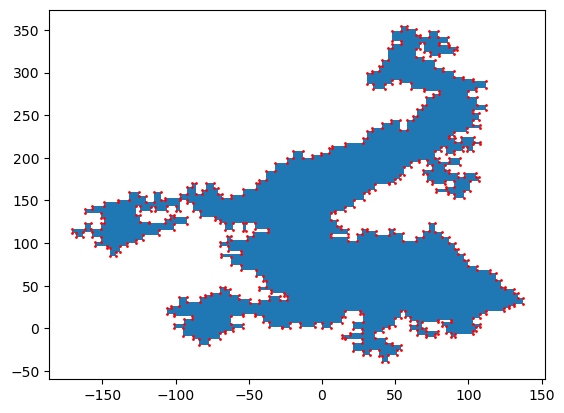

In [254]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.fill([p[0] for p in vertices], [p[1] for p in vertices])
plt.plot([p[0] for p in vertices], [p[1] for p in vertices], marker="o", color="r", lw=0, markersize=1)

## part 2

In [263]:
def input_part2(file):
    plan = []
    with open("inputs/18.txt") as f:
        for line in f:
            _, _, color = line.split()
            color = color.strip("()")
            
            direction = int(color[-1])
            match direction:
                case 0: direction = "R"
                case 1: direction = "D"
                case 2: direction = "L"
                case 3: direction = "U"
            
            distance = int(color[1:-1], 16)
            plan.append((direction, distance))

    return plan


plan = input_part2("inputs/18.txt")
vertices, edges, permimeter = get_polygon(plan)
volume = area(vertices) - permimeter / 2 + 1 + permimeter
int(volume)

129849166997110

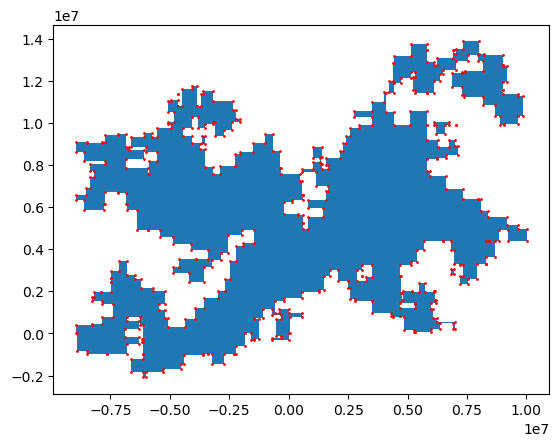

In [264]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.fill([p[0] for p in vertices], [p[1] for p in vertices])
plt.plot([p[0] for p in vertices], [p[1] for p in vertices], marker="o", color="r", lw=0, markersize=1)

# Day 19

## part 1

In [520]:
import copy
from dataclasses import dataclass
import utils
import re


@dataclass
class Part:
    x: int
    m: int
    a: int
    s: int
    
    @property
    def rating(self):
        return self.x + self.m + self.a + self.s


@dataclass
class PartRange:
    x: range
    m: range
    a: range
    s: range
    
    @property
    def volume(self):
        return len(self.x) * len(self.m) * len(self.a) * len(self.s)


class Rule:
    def __init__(self, symbol, operator, value, result_true, result_false):
        self.value = value
        self.result_true = result_true
        self.result_false = result_false
        self.operator = operator
        self.symbol = symbol
        
    def _process_part(self, input: Part):
        if self.symbol:
            symbol_value = getattr(input, self.symbol)
            if self.operator == "<":
                if symbol_value < self.value: return self.result_true
                else: return self.result_false
            else:
                if symbol_value > self.value: return self.result_true
                else: return self.result_false
        else:
            return self.result_true
        
    def _process_part_range(self, input: PartRange):
        symbol_range = getattr(input, self.symbol)
        true_range = None
        false_range = None

        if self.value in symbol_range:
            if self.operator == "<":
                true_s, true_e = symbol_range.start, self.value
                false_s, false_e = self.value, symbol_range.stop
            else:
                true_s, true_e = self.value + 1, symbol_range.stop
                false_s, false_e = symbol_range.start, self.value + 1
        elif self.value < symbol_range.start:
            true_s, true_e = 0, 0
            false_s, false_e = symbol_range.start, symbol_range.stop
        else:
            true_s, true_e = symbol_range.start, symbol_range.stop
            false_s, false_e = 0, 0
        
        if true_s > 0 and true_e > 0:
            true_range = copy.deepcopy(input)
            setattr(true_range, self.symbol, range(true_s, true_e))
        
        if false_s > 0 and false_e > 0:
            false_range = copy.deepcopy(input)
            setattr(false_range, self.symbol, range(false_s, false_e))
        
        return true_range, self.result_true, false_range, self.result_false

    def __call__(self, input: Part | PartRange):
        if isinstance(input, Part):
            return self._process_part(input)
        if isinstance(input, PartRange):
            return self._process_part_range(input)
        
    def __repr__(self):
        return f"{self.symbol} {self.operator} {self.value} = {{ {self.result_true}, {self.result_false} }}"


def parse_input(filename):
    wf_representation = dict()
    parts = []
    parse_workflows = True
    pattern = re.compile(r"([x|s|m|a|s])([<>])(\d+)\:(\w+)")

    with open(filename) as f:
        for line in f:
            line = line.strip()
            if len(line) == 0:
                parse_workflows = False
                continue
            
            if parse_workflows:
                name, definition = re.match(r"(.*?)(\{.*?\})", line).groups()
                definitions = definition.strip("{}").split(",")
                rules = [*pattern.findall(",".join(definitions[:-1])), definitions[-1]]
                
                wf_representation[name] = rules
            else:
                parts.append(Part(*utils.get_ints(line)))
    
    return parts, wf_representation


def build_workflows(input):
    workflows = dict()
    for name, rules in input.items():
        last_rule = None
        terminal_value = rules[-1]
        
        for rule in reversed(rules[:-1]):
            symbol, operator, value, result_true = rule
            if last_rule is None:
                last_rule = Rule(symbol, operator, int(value), result_true, terminal_value)
            else:
                last_rule = Rule(symbol, operator, int(value), result_true, last_rule)
        
        workflows[name] = last_rule

    return workflows


parts, wf_representation = parse_input("inputs/19.txt")

print(f"{len(parts)=}")
print(f"{len(wf_representation)=}")

workflows = build_workflows(wf_representation)
print(f"{len(workflows)=}")


len(parts)=200
len(wf_representation)=572
len(workflows)=572


In [521]:
def process_parts(parts, workflows):
    accepted = 0

    for part in parts:
        wf = workflows["in"]
        found_terminal_value = False
        
        while not found_terminal_value: 
            output = wf(part)
            
            while isinstance(output, Rule):
                output = output(part)
        
            if output in ("A", "R"):
                found_terminal_value = True
                if output == "A":
                    accepted += part.rating
            else: wf = workflows[output]
    
    return accepted


process_parts(parts, workflows)

333263

## part 2

In [523]:
accepted = 0
part_range = PartRange(range(1, 4001), range(1, 4001), range(1, 4001), range(1, 4001))
q = [(workflows["in"], part_range)]

while q:
    node, pr = q.pop()
    if isinstance(node, str):
        if node == "A":
            accepted += pr.volume
        elif node in workflows:
            q.append((workflows[node], pr))
    else:
        pr_left, left, pr_right, right = node(pr)
        if pr_left:
            q.append((left, pr_left))
        if pr_right:
            q.append((right, pr_right))

accepted

130745440937650

# Day 20

## part 1

In [63]:
from enum import Enum
from abc import ABC, abstractmethod
from typing import List


class Pulse(Enum):
    LOW = 1
    HIGH = 2


class Module(ABC):
    @abstractmethod
    def __call__(self, caller_id: str, pulse: Pulse):
        raise NotImplementedError
    

class FlipFlop(Module):
    def __init__(self, id: str, outputs: List[str]):
        self.id = id
        self.outputs = outputs
        self.is_on = False
    
    def __call__(self, caller_id: str, pulse: Pulse):
        if pulse == Pulse.HIGH:
            return (None, None)
            
        self.is_on = not self.is_on
        if self.is_on:
            output = Pulse.HIGH
        else:
            output = Pulse.LOW
        
        return self.outputs, output


class Conjunction(Module):
    def __init__(self, id: str, outputs: List[str]):
        self.id = id
        self.last_pulses = dict()
        self.outputs = outputs
    
    def add_input(self, input: str):
        self.last_pulses[input] = Pulse.LOW
    
    def __call__(self, caller_id: str, pulse: Pulse):
        self.last_pulses[caller_id] = pulse
        
        if all(p == Pulse.HIGH for p in self.last_pulses.values()):
            output = Pulse.LOW
        else:
            output = Pulse.HIGH
        
        return self.outputs, output
        

class Broadcast(Module):
    def __init__(self, id: str, outputs: List[str]):
        self.id = id
        self.outputs = outputs
    
    def __call__(self, caller_id: str, pulse: Pulse):
        return self.outputs, pulse


def build_graph(filename):
    graph = {}
    modules_to_init = {}

    with open(filename) as f:
        for line in f:
            line = line.strip()
            input, output_ids = line.split("->")
            input = input.strip()
            output_ids = [s.strip() for s in output_ids.split(",")]
                    
            # unique modules
            if input == "broadcaster":
                graph[input] = Broadcast(input, output_ids)
            else:
                module_type, module_id = input[0], input[1:]
                match module_type:
                    case "%": module = FlipFlop(module_id, output_ids)
                    case "&": 
                        module = Conjunction(module_id, output_ids)
                        modules_to_init[module_id] = module
                
                graph[module_id] = module

    for module_id, module in graph.items():
        for output in module.outputs:
            if output in modules_to_init:
                modules_to_init[output].add_input(module_id)
    
    return graph


In [64]:
graph = build_graph("inputs/20.txt")

low_sent = 0
high_sent = 0
push_number = 1_000

for i in range(push_number):
    q = [[("button", Pulse.LOW, "broadcaster")]]
    
    while q:
        current_steps = q.pop()
        next_steps = []
        for caller_id, pulse, module_id in current_steps:
            
            # count outgoing pulses
            match pulse:
                case Pulse.LOW: low_sent += 1
                case Pulse.HIGH: high_sent += 1
                        
            if module_id not in graph: continue
            
            module = graph[module_id]
            output_ids, pulse = module(caller_id, pulse)
            
            if output_ids is None: continue

            next_steps.extend((module_id, pulse, output) for output in output_ids)
        
        if len(next_steps) > 0:
            q.append(next_steps)


low_sent * high_sent

944750144

## part 2

In [69]:
import math


def find_second_degree_parent(target_id: str):
    for id, module in graph.items():
        for output in module.outputs:
            if output == target_id: rx_parent = id

    parents_of_parents = []
    for id, module in graph.items():
        for output in module.outputs:
            if output == rx_parent: parents_of_parents.append(id)

    return parents_of_parents


graph = build_graph("inputs/20.txt")
to_monitor = set(find_second_degree_parent("rx"))
pushes_to_first_low = dict()
i = 0

while len(to_monitor) > 0:
    i += 1
    q = [[("button", Pulse.LOW, "broadcaster")]]
    
    while q:
        current_steps = q.pop()
        next_steps = []
        for caller_id, pulse, module_id in current_steps:
            
            if caller_id in to_monitor and pulse == Pulse.HIGH:
                to_monitor.remove(caller_id)
                pushes_to_first_low[caller_id] = i
            
            if module_id not in graph: continue
            
            module = graph[module_id]
            output_ids, pulse = module(caller_id, pulse)
            
            if output_ids is None: continue

            next_steps.extend((module_id, pulse, output) for output in output_ids)
        
        if len(next_steps) > 0:
            q.append(next_steps)


math.lcm(*pushes_to_first_low.values())

222718819437131